<a href="https://colab.research.google.com/github/b-paisley/nlp-analysis/blob/main/from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies

In [1]:
!pip install xmltodict accelerate transformers torchcrf datasets seqeval evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:

In [2]:
!pip install git+https://github.com/kmkurn/pytorch-crf.git

  Cloning https://github.com/kmkurn/pytorch-crf.git to /tmp/pip-req-build-6nsns9bm
  Running command git clone --filter=blob:none --quiet https://github.com/kmkurn/pytorch-crf.git /tmp/pip-req-build-6nsns9bm
  Resolved https://github.com/kmkurn/pytorch-crf.git to commit 623e3402d00a2728e99d6e8486010d67c754267b
  Preparing metadata (setup.py) ... done
  Created wheel for pytorch-crf: filename=pytorch_crf-0.7.2-py3-none-any.whl size=6410 sha256=c25debd2309132de91722d0bb83edbedbc89009b4de6011546c5b09bfe9db899
  Stored in directory: /tmp/pip-ephem-wheel-cache-13shgy3b/wheels/fd/83/cc/f11543939f8911b8dcff86e2bd54423e21f779d0938958cc7f
Successfully built pytorch-crf


In [3]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from torch.utils.data import DataLoader, Dataset, random_split
from transformers import AutoTokenizer, AutoModel, pipeline
import matplotlib.pyplot as plt
import torch.optim as optim
from torchcrf import CRF
import torch.nn as nn
import pandas as pd
import numpy as np
import xmltodict
import random
import torch
import json
import sys
import os
import re

In [4]:
!unzip tei-xml-zip-files-20250225T091027Z-001.zip
!unzip tei-xml-zip-files/VRTI_C_1_14.zip
!unzip tei-xml-zip-files/VRTI_C_1_15.zip
!unzip tei-xml-zip-files/VRTI_C_1_16.zip
!unzip tei-xml-zip-files/VRTI_C_1_17.zip

Streaming output truncated to the last 5000 lines.
  inflating: xml/VRTI_C_1_17/VRTI_C_1_17_13_1837.xml  
  inflating: xml/VRTI_C_1_17/VRTI_C_1_17_42_6392.xml  
  inflating: xml/VRTI_C_1_17/VRTI_C_1_17_14_2067.xml  
  inflating: xml/VRTI_C_1_17/VRTI_C_1_17_11_1425.xml  
  inflating: xml/VRTI_C_1_17/VRTI_C_1_17_8_934.xml  
  inflating: xml/VRTI_C_1_17/VRTI_C_1_17_3_348.xml  
  inflating: xml/VRTI_C_1_17/VRTI_C_1_17_29_4984.xml  
  inflating: xml/VRTI_C_1_17/VRTI_C_1_17_24_4005.xml  
  inflating: xml/VRTI_C_1_17/VRTI_C_1_17_14_2025.xml  
  inflating: xml/VRTI_C_1_17/VRTI_C_1_17_13_1639.xml  
  inflating: xml/VRTI_C_1_17/VRTI_C_1_17_14_2033.xml  
  inflating: xml/VRTI_C_1_17/VRTI_C_1_17_17_2591.xml  
  inflating: xml/VRTI_C_1_17/VRTI_C_1_17_11_1308.xml  
  inflating: xml/VRTI_C_1_17/VRTI_C_1_17_34_5668.xml  
  inflating: xml/VRTI_C_1_17/VRTI_C_1_17_41_6285.xml  
  inflating: xml/VRTI_C_1_17/VRTI_C_1_17_14_1946.xml  
  inflating: xml/VRTI_C_1_17/VRTI_C_1_17_24_3878.xml  
  inflating: xml/V

# Preprocess Training Data

In [ ]:
fiant_data = []
for (r,d,f) in os.walk('xml'):
  if f:
    for fi in f:
      if '.xml' not in fi:
        continue
      with open(r+'/'+fi, 'r') as x:
        i = x.read()
      t = xmltodict.parse(i)
      fiant_data.append((r+'/'+fi,t))

In [ ]:
fiant_text = []
sources=[]
annotation_pattern = r'\<.*\>|,'
for f in fiant_data:
  sources.append(f[0])
  text = f[1]['TEI']['text']['body']['div']['div']['ab']
  if type(text) is list:
    text = [x for x in text if x is not None]
    text = "".join(text)
    text = re.sub(annotation_pattern, '', text)
  else:
    text = re.sub(annotation_pattern, '', text)
  fiant_text.append(text)

In [ ]:
random.seed(1739)
data = pd.read_csv('Chancery Pleadings Metadata + Transcripts - Sheet1.csv',usecols=['LONG_TITLE','SHORT_TITLE','PLEADING_TEXT'])
data = list(data['PLEADING_TEXT'])
fiant_text = fiant_text + data
random.shuffle(fiant_text)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("dslim/distilbert-ner")
model = AutoModel.from_pretrained("dslim/distilbert-ner")
pipe = pipeline('ner', model="dslim/distilbert-ner", tokenizer=tokenizer)

fiant_tokenised = []
for i, val in enumerate(fiant_text):
  fiant_tokenised.append(pipe(val))

# fiant_tokens = [cell for row in fiant_tokenised for cell in row]
fiant_token_strings = [[token['word'] for token in row] for row in fiant_tokenised]
fiant_token_labels = [[token['entity'] for token in row] for row in fiant_tokenised]
word_bag = set()
for row in fiant_token_strings:
  for word in row:
    word_bag.add(word)
labels = set()
for row in fiant_token_labels:
  for label in row:
    labels.add(label)
labels.add('O')
tokenised_data = {'text': fiant_text, 'tokens':fiant_token_strings, 'label':fiant_token_labels}
pd.DataFrame(tokenised_data).to_csv('tokenised_data.csv')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/669k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/926 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [ ]:
pd.DataFrame(tokenised_data)

,text,tokens,label
0,Grant to George Ardglasse; of the office of ke...,"[George, A, ##rd, ##glass, ##e, Dublin]","[B-PER, I-PER, I-PER, I-PER, I-PER, B-LOC]"
1,Pardon to Piers Shortall of St. Martyns county...,"[Pier, ##s, Short, ##all, St, ., Marty, ##ns, ...","[B-PER, B-PER, I-PER, I-PER, B-LOC, B-LOC, I-L..."
2,Commission to John lord primate of Ardmagh Tho...,"[A, ##rd, ##ma, ##gh, S, ##lane, Henry, Ba, ##...","[B-LOC, B-LOC, B-LOC, B-LOC, B-LOC, B-LOC, B-P..."
3,Pardon to Hugh earl of Tyrone and all the sons...,"[Hugh, Tyrone, Tyrone, Henry, Ho, ##ven, ##den...","[B-PER, B-LOC, B-LOC, B-PER, I-PER, I-PER, I-P..."
4,Pardon to Thomas roe Fitz Patrick of Daveston ...,"[Thomas, ##oe, Fi, ##tz, Patrick, Dave, ##ston...","[B-PER, I-PER, I-PER, I-PER, I-PER, B-ORG, B-O..."
...,...,...,...
9699,Lease (under commission 6 August xvii.) to Pau...,"[Lea, ##se, Paul, G, ##rene, K, ##yl, ##ma, ##...","[B-PER, B-PER, B-PER, I-PER, I-PER, B-LOC, B-L..."
9700,Lease (under commission 16 May xxxvi.) to sir ...,"[Lea, ##se, Henry, Wall, ##op, Se, ##ls, ##ker...","[B-PER, B-PER, B-PER, I-PER, I-PER, B-LOC, B-L..."
9701,Pardon to John O’Neyle eldest son of the earl ...,"[Pa, ##rdon, John, O, ’, N, ##ey, ##le, Tyrone]","[B-PER, B-PER, B-PER, I-PER, I-PER, I-PER, I-P..."
9702,Commission to sir Edm. Butler knt; to execute ...,"[Ed, ##m, ., Butler, English, Mo, ##uns, ##ter...","[B-PER, B-PER, B-PER, I-PER, B-MISC, B-LOC, B-..."


In [ ]:
re_tokenized = []
i = 0
sample = 45 #8888 65 34 1356 1234 652
s = fiant_tokenised[sample]
while i < len(s) - 1:
  st, en, la = s[i]['start'], s[i]['end'], s[i]['entity']
  next_st, next_en, next_la = s[i+1]['start'], s[i+1]['end'], s[i+1]['entity']
  if en == next_st:
    s[i]['word'] += s[i+1]['word'][2:]
    s[i]['end'] = next_en
    # s[i]['entity'] = s[i+1]['entity']
    s.pop(i+1)
    i -= 1
  i += 1
import spacy
from spacy import displacy
nlp = spacy.blank('en')
t = fiant_text[sample]
doc = nlp.make_doc(t)
spans = [[word['start'], word['end'], word['entity']] for word in s]
ents = []
for st, en, la in spans:
  ent = doc.char_span(st, en, label=la)
  if ent is None:
    continue
  ents.append(ent)
doc.ents = ents
displacy.render(doc, style='ent', jupyter=True)

In [ ]:
fiant_tokenised[0]

[{'entity': 'B-PER',
  'score': np.float32(0.9957349),
  'index': 3,
  'word': 'George',
  'start': 9,
  'end': 15},
 {'entity': 'I-PER',
  'score': np.float32(0.9960122),
  'index': 4,
  'word': 'A',
  'start': 16,
  'end': 17},
 {'entity': 'I-PER',
  'score': np.float32(0.9954542),
  'index': 5,
  'word': '##rd',
  'start': 17,
  'end': 19},
 {'entity': 'I-PER',
  'score': np.float32(0.9936108),
  'index': 6,
  'word': '##glass',
  'start': 19,
  'end': 24},
 {'entity': 'I-PER',
  'score': np.float32(0.99505615),
  'index': 7,
  'word': '##e',
  'start': 24,
  'end': 25},
 {'entity': 'B-LOC',
  'score': np.float32(0.99625033),
  'index': 32,
  'word': 'Dublin',
  'start': 146,
  'end': 152}]

In [ ]:
fiant_token_strings[0], fiant_token_labels[0], fiant_text[0]

(['George', 'A', '##rd', '##glass', '##e', 'Dublin'],
 ['B-PER', 'I-PER', 'I-PER', 'I-PER', 'I-PER', 'B-LOC'],
 'Grant to George Ardglasse; of the office of keeping tending and cleaning the new buildings houses rooms and edifices erected within the castle of Dublin for a convenient place for the abode of the lord deputy his train and household and for the assembling of the council; and also to keep set and tend the clock newly erected in the castle. To hold during pleasure with fees of 8d. a day for tending the buildings and 8d. a day for tending the clock. He is to have a lodging in the castle.—28 Ap. xx.')

In [ ]:
word_bag, labels

({'Morgan',
  'Somerset',
  'lad',
  '##rb',
  '##aka',
  '##hi',
  '##rrow',
  'CO',
  'ale',
  '##mma',
  '##bb',
  '##rit',
  'owe',
  'Male',
  'Ty',
  '##ko',
  'cross',
  'Man',
  '##bred',
  'honor',
  '##rton',
  '##cas',
  '##tical',
  '##nent',
  'Liberty',
  'Rare',
  'Greenwich',
  '##lover',
  '##lary',
  '##aco',
  '##qi',
  '##W',
  'Brass',
  'Forrest',
  '##otte',
  '##cs',
  'arch',
  'Nan',
  'et',
  'Ferris',
  'Carr',
  'Sea',
  '##mas',
  '##ix',
  'Them',
  '##rrie',
  '##rada',
  'Lewis',
  'Bern',
  'Fe',
  'Munster',
  'Ordnance',
  'Gee',
  'Costello',
  'Judges',
  '##ricks',
  '##oring',
  'Leary',
  '##s',
  '##y',
  '##hler',
  'Saxon',
  '##gau',
  '##yla',
  '##ppan',
  '##hart',
  'Edwards',
  '##reta',
  'Morrison',
  '##gum',
  '##nov',
  '##tu',
  '##derman',
  '##bu',
  'Nile',
  '##sma',
  'log',
  '##ffing',
  'Gardiner',
  '##bang',
  '##iss',
  '##hyl',
  '##kha',
  '##ryn',
  'Corbett',
  '##ques',
  '##yle',
  '##ahan',
  'du',
  '##iden',
  

In [ ]:
word2idx = {w: i for i, w in enumerate(word_bag)}
label2idx = {t: i for i, t in enumerate(labels)}
idx2label = {v: k for k, v in label2idx.items()}

In [ ]:
word2idx, label2idx, idx2label

({'Morgan': 0,
  'Somerset': 1,
  'lad': 2,
  '##rb': 3,
  '##aka': 4,
  '##hi': 5,
  '##rrow': 6,
  'CO': 7,
  'ale': 8,
  '##mma': 9,
  '##bb': 10,
  '##rit': 11,
  'owe': 12,
  'Male': 13,
  'Ty': 14,
  '##ko': 15,
  'cross': 16,
  'Man': 17,
  '##bred': 18,
  'honor': 19,
  '##rton': 20,
  '##cas': 21,
  '##tical': 22,
  '##nent': 23,
  'Liberty': 24,
  'Rare': 25,
  'Greenwich': 26,
  '##lover': 27,
  '##lary': 28,
  '##aco': 29,
  '##qi': 30,
  '##W': 31,
  'Brass': 32,
  'Forrest': 33,
  '##otte': 34,
  '##cs': 35,
  'arch': 36,
  'Nan': 37,
  'et': 38,
  'Ferris': 39,
  'Carr': 40,
  'Sea': 41,
  '##mas': 42,
  '##ix': 43,
  'Them': 44,
  '##rrie': 45,
  '##rada': 46,
  'Lewis': 47,
  'Bern': 48,
  'Fe': 49,
  'Munster': 50,
  'Ordnance': 51,
  'Gee': 52,
  'Costello': 53,
  'Judges': 54,
  '##ricks': 55,
  '##oring': 56,
  'Leary': 57,
  '##s': 58,
  '##y': 59,
  '##hler': 60,
  'Saxon': 61,
  '##gau': 62,
  '##yla': 63,
  '##ppan': 64,
  '##hart': 65,
  'Edwards': 66,
  '##re

In [ ]:
VOCAB = len(word_bag)
NUM_LABELS = len(labels)

# Create Model

In [ ]:
# BiLSTM + CRF Model
class BiLSTM_CRF(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_classes):
        super(BiLSTM_CRF, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, num_classes)
        self.crf = CRF(num_classes, batch_first=True)

    def forward(self, x, labels=None, mask=None):
        x = self.embedding(x)
        lstm_out, _ = self.lstm(x)
        emissions = self.fc(lstm_out)

        if labels is not None:
            loss = -self.crf(emissions, labels, mask=mask, reduction="mean")
            return loss
        else:
            return self.crf.decode(emissions, mask=mask)

In [ ]:
# Dataset Class
class TokenDataset(Dataset):
    def __init__(self, texts, labels, word2idx, label2idx, max_len=10):
        self.max_len = max_len
        self.word2idx = word2idx
        self.label2idx = label2idx
        self.data, self.labels, self.masks = self.preprocess(texts, labels)

    def preprocess(self, texts, labels):
        tokenized_texts = []
        tokenized_labels = []
        masks = []

        for text, label in zip(texts, labels):
            token_ids = [self.word2idx.get(word, 0) for word in text]
            label_ids = [self.label2idx.get(lbl, 0) for lbl in label]

            # Padding
            pad_length = self.max_len - len(token_ids)
            if pad_length > 0:
                token_ids += [0] * pad_length
                label_ids += [0] * pad_length
                mask = [1] * len(text) + [0] * pad_length
            else:
                token_ids = token_ids[:self.max_len]
                label_ids = label_ids[:self.max_len]
                mask = [1] * self.max_len

            # Ensure first timestep mask is always 1
            if mask[0] == 0:
                mask[0] = 1

            tokenized_texts.append(token_ids)
            tokenized_labels.append(label_ids)
            masks.append(mask)

        return torch.tensor(tokenized_texts, dtype=torch.long), \
               torch.tensor(tokenized_labels, dtype=torch.long), \
               torch.tensor(masks, dtype=torch.bool)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx], self.masks[idx]

In [ ]:
# Evaluation Function
def evaluate(model, dataloader):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for tokens, labels, masks in dataloader:
            preds = model(tokens, mask=masks)
            preds = [p[:sum(m)] for p, m in zip(preds, masks)]  # Remove padding
            labels = [l[:sum(m)] for l, m in zip(labels, masks)]

            all_preds.extend(preds)
            all_labels.extend(labels)

    # Convert to numpy for metrics
    flat_preds = np.concatenate(all_preds)
    flat_labels = np.concatenate(all_labels)

    acc = accuracy_score(flat_labels, flat_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(flat_labels, flat_preds, average="weighted", zero_division=0)

    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
    return acc, precision, recall, f1

In [ ]:
# train_texts = fiant_token_strings
# train_labels = fiant_token_labels
# Create dataset and dataloader
# train_dataset = TokenDataset(train_texts, train_labels, word2idx, label2idx)
dataset = TokenDataset(fiant_token_strings, fiant_token_labels, word2idx, label2idx)

train_size = int(0.8 * len(dataset))
eval_size = len(dataset) - train_size
train_dataset, test_dataset, eval_dataset = random_split(dataset, [train_size, eval_size])

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
eval_loader = DataLoader(eval_dataset, batch_size=128, shuffle=True)

# Initialize model, optimizer
model = BiLSTM_CRF(VOCAB, 128, 256, NUM_LABELS)
optimizer = optim.Adam(model.parameters(), lr=2e-4)

In [ ]:
logging = {'Loss':[], 'Accuracy':[], 'Precision':[], 'Recall':[], 'F1':[]}
# Training Loop
EPOCHS = 75
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for tokens, labels, masks in train_loader:
        optimizer.zero_grad()
        loss = model(tokens, labels, mask=masks)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")
    acc, p, r, f = evaluate(model, eval_loader)
    logging['Loss'].append(total_loss)
    logging['Accuracy'].append(acc)
    logging['Precision'].append(p)
    logging['Recall'].append(r)
    logging['F1'].append(f)

Epoch 1, Loss: 1000.8553
Accuracy: 0.5212, Precision: 0.6079, Recall: 0.5212, F1-score: 0.4524
Epoch 2, Loss: 603.5120
Accuracy: 0.6466, Precision: 0.6687, Recall: 0.6466, F1-score: 0.6220
Epoch 3, Loss: 497.3821
Accuracy: 0.7081, Precision: 0.7035, Recall: 0.7081, F1-score: 0.6951
Epoch 4, Loss: 427.1994
Accuracy: 0.7446, Precision: 0.7354, Recall: 0.7446, F1-score: 0.7363
Epoch 5, Loss: 379.5788
Accuracy: 0.7688, Precision: 0.7602, Recall: 0.7688, F1-score: 0.7624
Epoch 6, Loss: 344.6158
Accuracy: 0.7841, Precision: 0.7829, Recall: 0.7841, F1-score: 0.7783
Epoch 7, Loss: 317.7831
Accuracy: 0.7943, Precision: 0.7935, Recall: 0.7943, F1-score: 0.7885
Epoch 8, Loss: 295.1483
Accuracy: 0.8040, Precision: 0.8016, Recall: 0.8040, F1-score: 0.7992
Epoch 9, Loss: 276.0245
Accuracy: 0.8131, Precision: 0.8108, Recall: 0.8131, F1-score: 0.8088
Epoch 10, Loss: 259.2137
Accuracy: 0.8191, Precision: 0.8176, Recall: 0.8191, F1-score: 0.8147
Epoch 11, Loss: 243.9817
Accuracy: 0.8238, Precision: 0.82

In [ ]:
# Run evaluation
evaluate(model, eval_loader)

# Save model
torch.save(model.state_dict(), "bilstm_crf_model.pth")
print("Model saved successfully!")

Accuracy: 0.8288, Precision: 0.8273, Recall: 0.8288, F1-score: 0.8278
Model saved successfully!


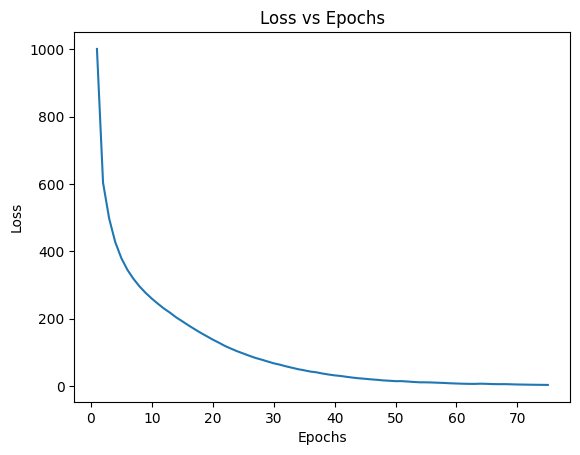

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(range(1, EPOCHS+1), logging['Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()
plt.clf()

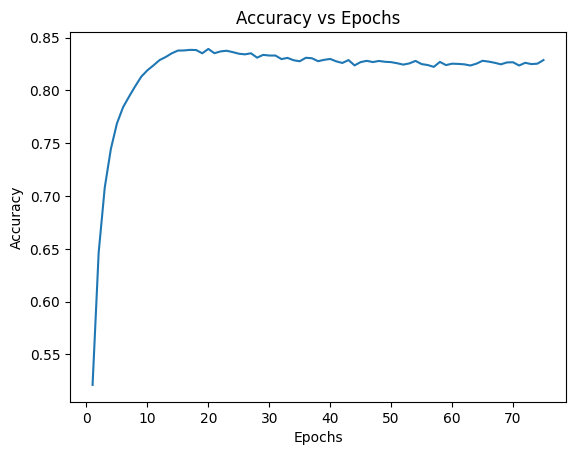

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(range(1, EPOCHS+1), logging['Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.show()
plt.clf()

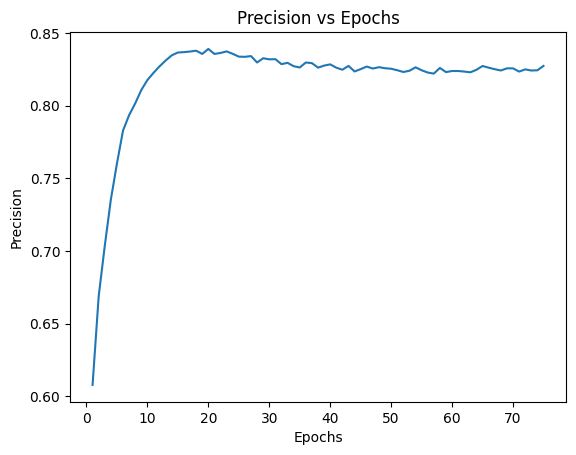

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(range(1, EPOCHS+1), logging['Precision'])
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Precision vs Epochs')
plt.show()
plt.clf()

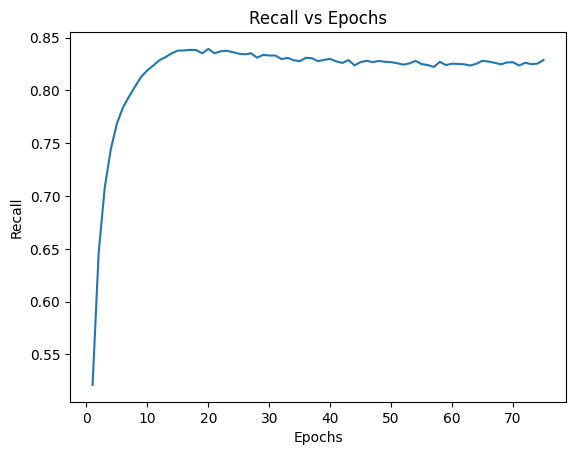

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(range(1, EPOCHS+1), logging['Recall'])
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Recall vs Epochs')
plt.show()
plt.clf()

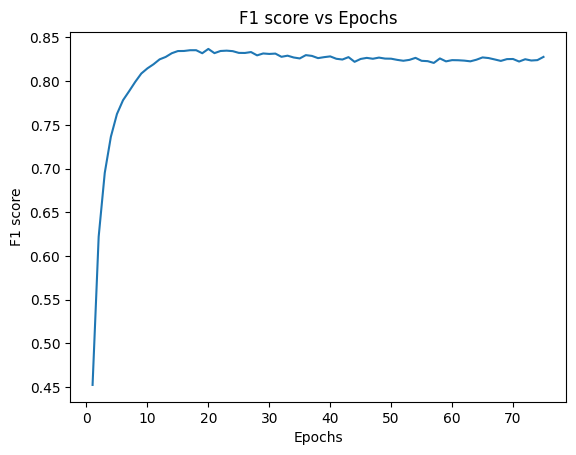

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(range(1, EPOCHS+1), logging['F1'])
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Epochs')
plt.show()
plt.clf()

# Preprocess Training Data

In [ ]:
fiant_data = []
for (r,d,f) in os.walk('xml'):
  if f:
    for fi in f:
      if '.xml' not in fi:
        continue
      with open(r+'/'+fi, 'r') as x:
        i = x.read()
      t = xmltodict.parse(i)
      fiant_data.append((r+'/'+fi,t))

In [ ]:
fiant_text = []
sources=[]
annotation_pattern = r'\<.*\>|,'
for f in fiant_data:
  sources.append(f[0])
  text = f[1]['TEI']['text']['body']['div']['div']['ab']
  if type(text) is list:
    text = [x for x in text if x is not None]
    text = "".join(text)
    text = re.sub(annotation_pattern, '', text)
  else:
    text = re.sub(annotation_pattern, '', text)
  fiant_text.append(text)

In [ ]:
random.seed(1739)
data = pd.read_csv('Chancery Pleadings Metadata + Transcripts - Sheet1.csv',usecols=['LONG_TITLE','SHORT_TITLE','PLEADING_TEXT'])
data = list(data['PLEADING_TEXT'])
fiant_text = fiant_text + data
random.shuffle(fiant_text)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("dslim/distilbert-ner")
model = AutoModel.from_pretrained("dslim/distilbert-ner")
pipe = pipeline('ner', model="dslim/distilbert-ner", tokenizer=tokenizer)

fiant_tokenised = []
for i, val in enumerate(fiant_text):
  fiant_tokenised.append(pipe(val))

# fiant_tokens = [cell for row in fiant_tokenised for cell in row]
fiant_token_strings = [[token['word'] for token in row] for row in fiant_tokenised]
fiant_token_labels = [[token['entity'] for token in row] for row in fiant_tokenised]
word_bag = set()
for row in fiant_token_strings:
  for word in row:
    word_bag.add(word)
labels = set()
for row in fiant_token_labels:
  for label in row:
    labels.add(label)
labels.add('O')
tokenised_data = {'text': fiant_text, 'tokens':fiant_token_strings, 'label':fiant_token_labels}
pd.DataFrame(tokenised_data).to_csv('tokenised_data.csv')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [ ]:
pd.DataFrame(tokenised_data)

,text,tokens,label
0,Lease under commission 26 Sept. ix. to Richard...,"[Richard, G, ##wyn, ##ne, Abbott, O, ##w, ##gh...","[B-PER, I-PER, I-PER, I-PER, B-PER, B-LOC, B-L..."
1,Pardon to Oliver Plunket of Rathemore county M...,"[Pa, ##rdon, Oliver, P, ##lu, ##nk, ##et, Rat,...","[B-PER, B-PER, B-PER, I-PER, I-PER, I-PER, I-P..."
2,Writ to Adam archbishop of Dublin; to determin...,"[Adam, Dublin, Christopher, E, ##ust, ##ace, C...","[B-PER, B-LOC, B-PER, I-PER, I-PER, I-PER, B-L..."
3,Pardon to David Fannyng kern John Butler fitz ...,"[Pa, ##rdon, David, Fanny, ##ng, John, Butler,...","[B-PER, B-PER, B-PER, I-PER, I-PER, I-PER, I-P..."
4,Pardon to John Chevir of Feddreth county Wexfo...,"[Pa, ##rdon, John, Ch, ##ev, ##ir, Fed, ##dre,...","[B-PER, B-PER, B-PER, I-PER, I-PER, I-PER, B-L..."
...,...,...,...
9699,Pardon to John boy Roche alias de Rupe son of ...,"[Pa, ##rdon, John, Roche, de, R, ##upe, David,...","[B-PER, B-PER, B-PER, I-PER, I-PER, I-PER, I-P..."
9700,Pardon to Edward Mostion of Athlone late sheri...,"[Pa, ##rdon, Edward, Most, ##ion, At, ##hl, ##...","[B-PER, B-PER, B-PER, I-PER, I-PER, B-LOC, B-L..."
9701,Commission to sir Henry Radclief knt. sir Geor...,"[Henry, Ra, ##d, ##c, ##lie, ##f, George, Stan...","[B-PER, I-PER, I-PER, I-PER, I-PER, I-PER, B-P..."
9702,Lease to Katherine Vaghan widow; of the castle...,"[Katherine, V, ##agh, ##an, Raw, ##lag, ##he, ...","[B-PER, I-PER, I-PER, I-PER, B-LOC, B-LOC, B-L..."


In [ ]:
re_tokenized = []
i = 0
sample = 45 #8888 65 34 1356 1234 652
s = fiant_tokenised[sample]
while i < len(s) - 1:
  st, en, la = s[i]['start'], s[i]['end'], s[i]['entity']
  next_st, next_en, next_la = s[i+1]['start'], s[i+1]['end'], s[i+1]['entity']
  if en == next_st:
    s[i]['word'] += s[i+1]['word'][2:]
    s[i]['end'] = next_en
    # s[i]['entity'] = s[i+1]['entity']
    s.pop(i+1)
    i -= 1
  i += 1
import spacy
from spacy import displacy
nlp = spacy.blank('en')
t = fiant_text[sample]
doc = nlp.make_doc(t)
spans = [[word['start'], word['end'], word['entity']] for word in s]
ents = []
for st, en, la in spans:
  ent = doc.char_span(st, en, label=la)
  if ent is None:
    continue
  ents.append(ent)
doc.ents = ents
displacy.render(doc, style='ent', jupyter=True)

In [ ]:
fiant_tokenised[0]

[{'entity': 'B-PER',
  'score': np.float32(0.98367083),
  'index': 12,
  'word': 'Richard',
  'start': 39,
  'end': 46},
 {'entity': 'I-PER',
  'score': np.float32(0.9957392),
  'index': 13,
  'word': 'G',
  'start': 47,
  'end': 48},
 {'entity': 'I-PER',
  'score': np.float32(0.98456305),
  'index': 14,
  'word': '##wyn',
  'start': 48,
  'end': 51},
 {'entity': 'I-PER',
  'score': np.float32(0.99287146),
  'index': 15,
  'word': '##ne',
  'start': 51,
  'end': 53},
 {'entity': 'B-PER',
  'score': np.float32(0.876625),
  'index': 20,
  'word': 'Abbott',
  'start': 72,
  'end': 78},
 {'entity': 'B-LOC',
  'score': np.float32(0.9946741),
  'index': 25,
  'word': 'O',
  'start': 90,
  'end': 91},
 {'entity': 'B-LOC',
  'score': np.float32(0.99155736),
  'index': 26,
  'word': '##w',
  'start': 91,
  'end': 92},
 {'entity': 'B-LOC',
  'score': np.float32(0.9935284),
  'index': 27,
  'word': '##ghter',
  'start': 92,
  'end': 97},
 {'entity': 'B-LOC',
  'score': np.float32(0.9912776),
  'i

In [ ]:
fiant_token_strings[0], fiant_token_labels[0], fiant_text[0]

(['Richard',
  'G',
  '##wyn',
  '##ne',
  'Abbott',
  'O',
  '##w',
  '##ghter',
  '##ad',
  'F',
  '##ynn',
  '##agh',
  '##es',
  'Kildare',
  'St',
  '.',
  'Thomas',
  'Dublin',
  'English',
  'English'],
 ['B-PER',
  'I-PER',
  'I-PER',
  'I-PER',
  'B-PER',
  'B-LOC',
  'B-LOC',
  'B-LOC',
  'B-LOC',
  'B-LOC',
  'B-LOC',
  'B-LOC',
  'B-LOC',
  'B-LOC',
  'B-ORG',
  'B-LOC',
  'I-LOC',
  'I-ORG',
  'B-MISC',
  'B-MISC'],
 'Lease under commission 26 Sept. ix. to Richard Gwynne gentleman; of the Abbott’s lands in Owghterad and tithe conn in Fynnaghes county Kildare parcel of the possessions of the late monastery of St. Thomas the Martyr Dublin. To hold for 21 years; rent £4 3s. 2d. Maintaining one English archer not to let except to English by both parents and not to charge coyne. Fine £4 3s.—31 December xiii.')

In [ ]:
word_bag, labels

({'Holt',
  '##oi',
  'Eddy',
  'Clerk',
  '##icus',
  '##dek',
  'lawn',
  '##unta',
  '##ales',
  '##mee',
  '##ston',
  '##chs',
  '##riz',
  'franchises',
  '##elf',
  'Cara',
  '##wei',
  '##yar',
  'Hobart',
  'Hand',
  'Punk',
  'Roses',
  '##eer',
  '##ario',
  '##ash',
  'Sang',
  'Pound',
  '—',
  'Homes',
  '##hl',
  '##path',
  '##nat',
  'Evans',
  'Der',
  '##dela',
  '##eri',
  '##agu',
  '##lic',
  '##han',
  '##ington',
  '##free',
  '##cup',
  '##uve',
  'Too',
  'bank',
  '·',
  '##cline',
  'Peck',
  'Mom',
  'Cross',
  '##thest',
  '##rama',
  'Anya',
  'Davies',
  'George',
  'the',
  'Carla',
  '##ivo',
  '##rion',
  '##tage',
  '##polis',
  'Ed',
  '##sion',
  'merchant',
  '##sor',
  '##ado',
  '##field',
  'Circuit',
  '##el',
  'for',
  'CO',
  'Christ',
  'Don',
  'Morrison',
  'Rain',
  'Des',
  'Del',
  'Brian',
  'Cast',
  '##bler',
  'Wexford',
  '##ll',
  '##rito',
  'You',
  '##tler',
  'Count',
  'Andre',
  '##sche',
  'De',
  'Harvest',
  'London',
 

In [ ]:
word2idx = {w: i for i, w in enumerate(word_bag)}
label2idx = {t: i for i, t in enumerate(labels)}
idx2label = {v: k for k, v in label2idx.items()}

In [ ]:
word2idx, label2idx, idx2label

({'Holt': 0,
  '##oi': 1,
  'Eddy': 2,
  'Clerk': 3,
  '##icus': 4,
  '##dek': 5,
  'lawn': 6,
  '##unta': 7,
  '##ales': 8,
  '##mee': 9,
  '##ston': 10,
  '##chs': 11,
  '##riz': 12,
  'franchises': 13,
  '##elf': 14,
  'Cara': 15,
  '##wei': 16,
  '##yar': 17,
  'Hobart': 18,
  'Hand': 19,
  'Punk': 20,
  'Roses': 21,
  '##eer': 22,
  '##ario': 23,
  '##ash': 24,
  'Sang': 25,
  'Pound': 26,
  '—': 27,
  'Homes': 28,
  '##hl': 29,
  '##path': 30,
  '##nat': 31,
  'Evans': 32,
  'Der': 33,
  '##dela': 34,
  '##eri': 35,
  '##agu': 36,
  '##lic': 37,
  '##han': 38,
  '##ington': 39,
  '##free': 40,
  '##cup': 41,
  '##uve': 42,
  'Too': 43,
  'bank': 44,
  '·': 45,
  '##cline': 46,
  'Peck': 47,
  'Mom': 48,
  'Cross': 49,
  '##thest': 50,
  '##rama': 51,
  'Anya': 52,
  'Davies': 53,
  'George': 54,
  'the': 55,
  'Carla': 56,
  '##ivo': 57,
  '##rion': 58,
  '##tage': 59,
  '##polis': 60,
  'Ed': 61,
  '##sion': 62,
  'merchant': 63,
  '##sor': 64,
  '##ado': 65,
  '##field': 66,
  

In [ ]:
VOCAB = len(word_bag)
NUM_LABELS = len(labels)

# Create Model

In [ ]:
# BiLSTM + CRF Model
class BiLSTM_CRF(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_classes):
        super(BiLSTM_CRF, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, num_classes)
        self.crf = CRF(num_classes, batch_first=True)

    def forward(self, x, labels=None, mask=None):
        x = self.embedding(x)
        lstm_out, _ = self.lstm(x)
        emissions = self.fc(lstm_out)

        if labels is not None:
            loss = -self.crf(emissions, labels, mask=mask, reduction="mean")
            return loss
        else:
            return self.crf.decode(emissions, mask=mask)

In [ ]:
# Dataset Class
class TokenDataset(Dataset):
    def __init__(self, texts, labels, word2idx, label2idx, max_len=10):
        self.max_len = max_len
        self.word2idx = word2idx
        self.label2idx = label2idx
        self.data, self.labels, self.masks = self.preprocess(texts, labels)

    def preprocess(self, texts, labels):
        tokenized_texts = []
        tokenized_labels = []
        masks = []

        for text, label in zip(texts, labels):
            token_ids = [self.word2idx.get(word, 0) for word in text]
            label_ids = [self.label2idx.get(lbl, 0) for lbl in label]

            # Padding
            pad_length = self.max_len - len(token_ids)
            if pad_length > 0:
                token_ids += [0] * pad_length
                label_ids += [0] * pad_length
                mask = [1] * len(text) + [0] * pad_length
            else:
                token_ids = token_ids[:self.max_len]
                label_ids = label_ids[:self.max_len]
                mask = [1] * self.max_len

            # Ensure first timestep mask is always 1
            if mask[0] == 0:
                mask[0] = 1

            tokenized_texts.append(token_ids)
            tokenized_labels.append(label_ids)
            masks.append(mask)

        return torch.tensor(tokenized_texts, dtype=torch.long), \
               torch.tensor(tokenized_labels, dtype=torch.long), \
               torch.tensor(masks, dtype=torch.bool)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx], self.masks[idx]

In [ ]:
# Evaluation Function
def evaluate(model, dataloader):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for tokens, labels, masks in dataloader:
            preds = model(tokens, mask=masks)
            preds = [p[:sum(m)] for p, m in zip(preds, masks)]  # Remove padding
            labels = [l[:sum(m)] for l, m in zip(labels, masks)]

            all_preds.extend(preds)
            all_labels.extend(labels)

    # Convert to numpy for metrics
    flat_preds = np.concatenate(all_preds)
    flat_labels = np.concatenate(all_labels)

    acc = accuracy_score(flat_labels, flat_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(flat_labels, flat_preds, average="weighted", zero_division=0)

    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
    return acc, precision, recall, f1

In [ ]:
# train_texts = fiant_token_strings
# train_labels = fiant_token_labels
# Create dataset and dataloader
# train_dataset = TokenDataset(train_texts, train_labels, word2idx, label2idx)
dataset = TokenDataset(fiant_token_strings, fiant_token_labels, word2idx, label2idx)

# train_size = int(0.8 * len(dataset))
# eval_size = len(dataset) - train_size
# train_dataset, eval_dataset = random_split(dataset, [train_size, eval_size])

train_size = int(0.75 * len(dataset))
test_size = int(0.40 * train_size)
eval_size = len(dataset) - train_size - test_size

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=True)
eval_loader = DataLoader(eval_dataset, batch_size=128, shuffle=True)

# Initialize model, optimizer
model = BiLSTM_CRF(VOCAB, 128, 256, NUM_LABELS)
optimizer = optim.Adam(model.parameters(), lr=3e-5, weight_decay=0.03)

In [ ]:
logging = {'Loss':[], 'Accuracy':[], 'Precision':[], 'Recall':[], 'F1':[]}
# Training Loop
EPOCHS = 75
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for tokens, labels, masks in train_loader:
        optimizer.zero_grad()
        loss = model(tokens, labels, mask=masks)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")
    acc, p, r, f = evaluate(model, test_loader)
    logging['Loss'].append(total_loss)
    logging['Accuracy'].append(acc)
    logging['Precision'].append(p)
    logging['Recall'].append(r)
    logging['F1'].append(f)

Epoch 1, Loss: 1228.4238
Accuracy: 0.3554, Precision: 0.4133, Recall: 0.3554, F1-score: 0.3781
Epoch 2, Loss: 1182.9257
Accuracy: 0.4425, Precision: 0.4359, Recall: 0.4425, F1-score: 0.4360
Epoch 3, Loss: 1125.6775
Accuracy: 0.4854, Precision: 0.4563, Recall: 0.4854, F1-score: 0.4684
Epoch 4, Loss: 1039.2590
Accuracy: 0.5148, Precision: 0.4885, Recall: 0.5148, F1-score: 0.4914
Epoch 5, Loss: 902.9442
Accuracy: 0.5228, Precision: 0.5243, Recall: 0.5228, F1-score: 0.4891
Epoch 6, Loss: 767.8104
Accuracy: 0.5408, Precision: 0.5047, Recall: 0.5408, F1-score: 0.5159
Epoch 7, Loss: 717.0706
Accuracy: 0.5404, Precision: 0.4968, Recall: 0.5404, F1-score: 0.5174
Epoch 8, Loss: 698.1634
Accuracy: 0.5515, Precision: 0.5082, Recall: 0.5515, F1-score: 0.5283
Epoch 9, Loss: 683.9364
Accuracy: 0.5628, Precision: 0.5199, Recall: 0.5628, F1-score: 0.5394
Epoch 10, Loss: 671.4278
Accuracy: 0.5736, Precision: 0.5306, Recall: 0.5736, F1-score: 0.5498
Epoch 11, Loss: 660.5472
Accuracy: 0.5828, Precision: 0

KeyboardInterrupt: 

In [ ]:
# Run evaluation
evaluate(model, eval_loader)

# Save model
torch.save(model.state_dict(), "bilstm_crf_model.pth")
print("Model saved successfully!")

Accuracy: 0.5968, Precision: 0.5537, Recall: 0.5968, F1-score: 0.5721
Model saved successfully!


In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
# preds = trainer.predict(tokenized_datasets['eval'])

y_pred, y_true = [], []
for inputs, labels in eval_loader:
    output = net(inputs) # Feed Network

    output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
    y_pred.extend(output) # Save Prediction

    labels = labels.data.cpu().numpy()
    y_true.extend(labels) # Save Truth

cm = confusion_matrix(y_true, y_pred, labels=range(len(labels)))

# cm = confusion_matrix(preds.label_ids.flatten(), preds.predictions.argmax(axis=-1).flatten(), labels=range(len(label_names)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
# plt.figure(figsize=(15,10))
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (75,) and (12,)

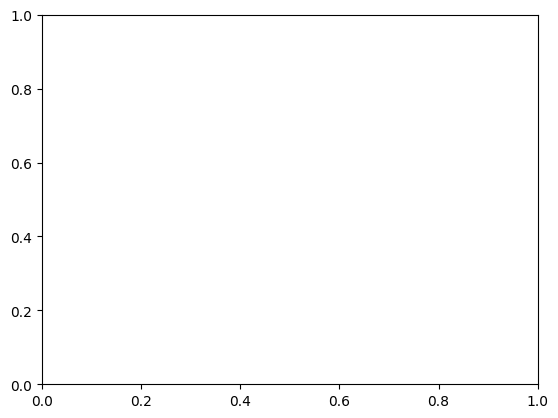

In [ ]:
plt.plot(range(1, EPOCHS+1), logging['Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()
plt.clf()

In [ ]:
plt.plot(range(1, EPOCHS+1), logging['Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.show()
plt.clf()

In [ ]:
plt.plot(range(1, EPOCHS+1), logging['Precision'])
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Precision vs Epochs')
plt.show()
plt.clf()

In [ ]:
plt.plot(range(1, EPOCHS+1), logging['Recall'])
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Recall vs Epochs')
plt.show()
plt.clf()

In [ ]:
plt.plot(range(1, EPOCHS+1), logging['F1'])
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Epochs')
plt.show()
plt.clf()

# Compare Unmodified Benchmarks

In [ ]:
model = AutoModel.from_pretrained("dslim/bert-base-NER")
tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
nlp = pipeline("ner", model=model, tokenizer=tokenizer)

from transformers import TrainingArguments, Trainer

training_args = TrainingArguments("test_trainer"),


import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")


def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)

trainer.evaluate()

config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0
The model 'BertModel' is not supported for ner. Supported models are ['AlbertForTokenClassification', 'BertForTokenClassification', 'BigBirdForTokenClassification', 'BioGptForTokenClassification', 'BloomForTokenClassification', 'BrosForTokenClassification', 'CamembertForTokenClassification', 'CanineForTokenClassification', 'ConvBertForTokenClassification', 'Data2VecTextForTokenClassification', 'DebertaForTokenClassification', 'DebertaV2ForTokenClassification', 'DiffLlamaForTokenClassification', 'DistilBertForTokenClassification', 'ElectraForTokenClassification', 'ErnieForTokenClassification', 'ErnieMForTokenClassification', 'EsmForTokenClassification', 'FalconForTokenClassification', 'FlaubertForTokenClassification', 'FNetForTokenClassification', 'FunnelForTokenClassification', 'GemmaForTokenClassification', 'Gemma2ForTokenClassification', 'GlmForTokenClassification', 'GPT2ForTokenClassification', 'GPT2ForTokenClassification', 'GPTBigCodeForTokenClassification'

ImportError: cannot import name 'load_metric' from 'datasets' (/usr/local/lib/python3.11/dist-packages/datasets/__init__.py)

# Destiny

# Preprocess Training Data

In [5]:
fiant_data = []
for (r,d,f) in os.walk('xml'):
  if f:
    for fi in f:
      if '.xml' not in fi:
        continue
      with open(r+'/'+fi, 'r') as x:
        i = x.read()
      t = xmltodict.parse(i)
      fiant_data.append((r+'/'+fi,t))

In [6]:
fiant_text = []
sources=[]
annotation_pattern = r'\<.*\>|,'
for f in fiant_data:
  sources.append(f[0])
  text = f[1]['TEI']['text']['body']['div']['div']['ab']
  if type(text) is list:
    text = [x for x in text if x is not None]
    text = "".join(text)
    text = re.sub(annotation_pattern, '', text)
  else:
    text = re.sub(annotation_pattern, '', text)
  fiant_text.append(text)

In [7]:
random.seed(1739)
data = pd.read_csv('Chancery Pleadings Metadata + Transcripts - Sheet1.csv',usecols=['LONG_TITLE','SHORT_TITLE','PLEADING_TEXT'])
data = list(data['PLEADING_TEXT'])
fiant_text = fiant_text + data
random.shuffle(fiant_text)

In [8]:
tokenizer = AutoTokenizer.from_pretrained("dslim/distilbert-ner")
model = AutoModel.from_pretrained("dslim/distilbert-ner")
pipe = pipeline('ner', model="dslim/distilbert-ner", tokenizer=tokenizer)

fiant_tokenised = []
for i, val in enumerate(fiant_text):
  fiant_tokenised.append(pipe(val))

# fiant_tokens = [cell for row in fiant_tokenised for cell in row]
fiant_token_strings = [[token['word'] for token in row] for row in fiant_tokenised]
fiant_token_labels = [[token['entity'] for token in row] for row in fiant_tokenised]
word_bag = set()
for row in fiant_token_strings:
  for word in row:
    word_bag.add(word)
labels = set()
for row in fiant_token_labels:
  for label in row:
    labels.add(label)
labels.add('O')
tokenised_data = {'text': fiant_text, 'tokens':fiant_token_strings, 'label':fiant_token_labels}
pd.DataFrame(tokenised_data).to_csv('tokenised_data.csv')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/669k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/926 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [9]:
fiant_token_strings = [[token['word'] for token in row] for row in fiant_tokenised]
fiant_token_labels = [[token['entity'] for token in row] for row in fiant_tokenised]
word_bag = set()
for row in fiant_token_strings:
  for word in row:
    word_bag.add(word)
labels = set()
for row in fiant_token_labels:
  for label in row:
    labels.add(label)
labels.add('O')
tokenised_data = {'text': fiant_text, 'tokens':fiant_token_strings, 'label':fiant_token_labels}
pd.DataFrame(tokenised_data).to_csv('tokenised_data.csv')

In [10]:
pd.DataFrame(tokenised_data)

,text,tokens,label
0,Pardon to ( ) Marnell of Slivardagh county Tip...,"[Pa, ##rdon, Mar, ##nell, S, ##liva, ##rda, ##...","[B-PER, B-PER, B-PER, B-PER, B-LOC, B-LOC, B-L..."
1,Grant to mayor sheriffs burgesses and commonal...,"[Dr, ##og, ##hed, ##a, My, ##ll, ##mote, Wind,...","[B-LOC, B-LOC, B-LOC, B-LOC, B-LOC, B-LOC, B-L..."
2,Pardon to Rich. Ewstace of Swordewalliston cou...,"[Pa, Rich, ., E, ##ws, ##ta, ##ce, Sword, ##ew...","[B-PER, B-PER, B-PER, I-PER, I-PER, I-PER, I-P..."
3,Lease (under queen's letter 14 December xxviii...,"[Daniel, ., Kelly, ##e, K, ##ynn, ##agh, ##e, ...","[B-PER, B-PER, I-PER, I-PER, B-LOC, B-LOC, B-L..."
4,Lease to Ranulph Brereton of Castelton of Moyl...,"[Ra, ##nu, ##l, ##ph, B, ##rer, ##eton, Cast, ...","[B-PER, B-PER, B-PER, B-PER, I-PER, I-PER, I-P..."
...,...,...,...
9699,Pardon to James Shortall of Ballylorcan county...,"[James, Short, ##all, Ball, ##yl, ##or, ##can,...","[B-PER, I-PER, I-PER, B-LOC, B-LOC, B-LOC, B-L..."
9700,Grant to John Thickpennye gentleman; of the of...,"[John, T, ##hic, ##k, ##pen, ##ny, ##e, Water,...","[B-PER, I-PER, I-PER, I-PER, I-PER, I-PER, I-P..."
9701,Grant to Richard Finglas of Waspeliston gentle...,"[Richard, Fin, ##g, ##las, Was, ##pel, ##ist, ...","[B-PER, I-PER, I-PER, I-PER, B-LOC, B-LOC, B-L..."
9702,Grant to James Gallwaie of Limerick merchant; ...,"[James, G, ##all, ##wai, ##e, Limerick, Michae...","[B-PER, I-PER, I-PER, I-PER, I-PER, B-LOC, B-P..."


In [11]:
re_tokenized = []
i = 0
sample = 45 #8888 65 34 1356 1234 652
s = fiant_tokenised[sample]
while i < len(s) - 1:
  st, en, la = s[i]['start'], s[i]['end'], s[i]['entity']
  next_st, next_en, next_la = s[i+1]['start'], s[i+1]['end'], s[i+1]['entity']
  if en == next_st:
    s[i]['word'] += s[i+1]['word'][2:]
    s[i]['end'] = next_en
    # s[i]['entity'] = s[i+1]['entity']
    s.pop(i+1)
    i -= 1
  i += 1
import spacy
from spacy import displacy
nlp = spacy.blank('en')
t = fiant_text[sample]
doc = nlp.make_doc(t)
spans = [[word['start'], word['end'], word['entity']] for word in s]
ents = []
for st, en, la in spans:
  ent = doc.char_span(st, en, label=la)
  if ent is None:
    continue
  ents.append(ent)
doc.ents = ents
displacy.render(doc, style='ent', jupyter=True)

In [12]:
fiant_tokenised[0]

[{'entity': 'B-PER',
  'score': np.float32(0.967312),
  'index': 1,
  'word': 'Pa',
  'start': 0,
  'end': 2},
 {'entity': 'B-PER',
  'score': np.float32(0.80143183),
  'index': 2,
  'word': '##rdon',
  'start': 2,
  'end': 6},
 {'entity': 'B-PER',
  'score': np.float32(0.99758554),
  'index': 6,
  'word': 'Mar',
  'start': 14,
  'end': 17},
 {'entity': 'B-PER',
  'score': np.float32(0.9962884),
  'index': 7,
  'word': '##nell',
  'start': 17,
  'end': 21},
 {'entity': 'B-LOC',
  'score': np.float32(0.9930127),
  'index': 9,
  'word': 'S',
  'start': 25,
  'end': 26},
 {'entity': 'B-LOC',
  'score': np.float32(0.9937437),
  'index': 10,
  'word': '##liva',
  'start': 26,
  'end': 30},
 {'entity': 'B-LOC',
  'score': np.float32(0.9937118),
  'index': 11,
  'word': '##rda',
  'start': 30,
  'end': 33},
 {'entity': 'B-LOC',
  'score': np.float32(0.992927),
  'index': 12,
  'word': '##gh',
  'start': 33,
  'end': 35},
 {'entity': 'B-LOC',
  'score': np.float32(0.8814144),
  'index': 14,
  

In [13]:
fiant_token_strings[0], fiant_token_labels[0], fiant_text[0]

(['Pa',
  '##rdon',
  'Mar',
  '##nell',
  'S',
  '##liva',
  '##rda',
  '##gh',
  'Tipperary'],
 ['B-PER',
  'B-PER',
  'B-PER',
  'B-PER',
  'B-LOC',
  'B-LOC',
  'B-LOC',
  'B-LOC',
  'B-LOC'],
 'Pardon to ( ) Marnell of Slivardagh county Tipperary. Fine £3.—11 Jany. xiv.')

In [14]:
word_bag, labels

({'##rot',
  '##wi',
  'Rani',
  'Jasper',
  'City',
  'ON',
  'March',
  '##page',
  '##D',
  'bell',
  '##ido',
  '##ming',
  '##rd',
  '##gol',
  '##min',
  '##oon',
  '##hima',
  '##rent',
  '##lat',
  '##cion',
  '##iki',
  'Nichols',
  '##comb',
  'Bob',
  'country',
  '##elle',
  '##voy',
  'Craft',
  'Perry',
  '##fen',
  'T',
  'Hilton',
  'Tyrone',
  '##ear',
  '##hler',
  '##rap',
  'boat',
  'Vic',
  '##lt',
  '##bil',
  '##acher',
  '##gart',
  'Cheshire',
  '##lown',
  '##ync',
  'Holland',
  'honor',
  'Durham',
  '##uth',
  'glass',
  '##haven',
  '##tan',
  'ass',
  'Kelly',
  '##lake',
  'Daniel',
  '##ol',
  '##zer',
  'Citizens',
  '##sa',
  '##q',
  '##ity',
  'Gibson',
  'Fest',
  '##line',
  '##rsk',
  'Apollo',
  'met',
  'To',
  '##than',
  'Mail',
  'Skin',
  '##cona',
  '##rino',
  'Rey',
  'Jesse',
  'Edo',
  '##ager',
  '##dson',
  'Cary',
  'Chester',
  'Higgins',
  '##mu',
  'Davies',
  '##uld',
  '##sul',
  'Gunn',
  'Rex',
  '##utive',
  '##net',
  'Ava

In [15]:
word2idx = {w: i for i, w in enumerate(word_bag)}
label2idx = {t: i for i, t in enumerate(labels)}
idx2label = {v: k for k, v in label2idx.items()}

In [16]:
word2idx, label2idx, idx2label

({'##rot': 0,
  '##wi': 1,
  'Rani': 2,
  'Jasper': 3,
  'City': 4,
  'ON': 5,
  'March': 6,
  '##page': 7,
  '##D': 8,
  'bell': 9,
  '##ido': 10,
  '##ming': 11,
  '##rd': 12,
  '##gol': 13,
  '##min': 14,
  '##oon': 15,
  '##hima': 16,
  '##rent': 17,
  '##lat': 18,
  '##cion': 19,
  '##iki': 20,
  'Nichols': 21,
  '##comb': 22,
  'Bob': 23,
  'country': 24,
  '##elle': 25,
  '##voy': 26,
  'Craft': 27,
  'Perry': 28,
  '##fen': 29,
  'T': 30,
  'Hilton': 31,
  'Tyrone': 32,
  '##ear': 33,
  '##hler': 34,
  '##rap': 35,
  'boat': 36,
  'Vic': 37,
  '##lt': 38,
  '##bil': 39,
  '##acher': 40,
  '##gart': 41,
  'Cheshire': 42,
  '##lown': 43,
  '##ync': 44,
  'Holland': 45,
  'honor': 46,
  'Durham': 47,
  '##uth': 48,
  'glass': 49,
  '##haven': 50,
  '##tan': 51,
  'ass': 52,
  'Kelly': 53,
  '##lake': 54,
  'Daniel': 55,
  '##ol': 56,
  '##zer': 57,
  'Citizens': 58,
  '##sa': 59,
  '##q': 60,
  '##ity': 61,
  'Gibson': 62,
  'Fest': 63,
  '##line': 64,
  '##rsk': 65,
  'Apollo': 6

In [17]:
VOCAB = len(word_bag)
NUM_LABELS = len(labels)

# Create Model

In [31]:
# BiLSTM + CRF Model
class BiLSTM_CRF(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_classes):
        super(BiLSTM_CRF, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, num_classes)
        self.crf = CRF(num_classes, batch_first=True)

    def forward(self, x, labels=None, mask=None):
        x = self.embedding(x)
        lstm_out, _ = self.lstm(x)
        emissions = self.fc(lstm_out)

        if labels is not None:
            loss = -self.crf(emissions, labels, mask=mask, reduction="mean")
            return loss
        else:
            return self.crf.decode(emissions, mask=mask)

In [32]:
# Dataset Class
class TokenDataset(Dataset):
    def __init__(self, texts, labels, word2idx, label2idx, max_len=10):
        self.max_len = max_len
        self.word2idx = word2idx
        self.label2idx = label2idx
        self.data, self.labels, self.masks = self.preprocess(texts, labels)

    def preprocess(self, texts, labels):
        tokenized_texts = []
        tokenized_labels = []
        masks = []

        for text, label in zip(texts, labels):
            token_ids = [self.word2idx.get(word, 0) for word in text]
            label_ids = [self.label2idx.get(lbl, 0) for lbl in label]

            # Padding
            pad_length = self.max_len - len(token_ids)
            if pad_length > 0:
                token_ids += [0] * pad_length
                label_ids += [0] * pad_length
                mask = [1] * len(text) + [0] * pad_length
            else:
                token_ids = token_ids[:self.max_len]
                label_ids = label_ids[:self.max_len]
                mask = [1] * self.max_len

            # Ensure first timestep mask is always 1
            if mask[0] == 0:
                mask[0] = 1

            tokenized_texts.append(token_ids)
            tokenized_labels.append(label_ids)
            masks.append(mask)

        return torch.tensor(tokenized_texts, dtype=torch.long), \
               torch.tensor(tokenized_labels, dtype=torch.long), \
               torch.tensor(masks, dtype=torch.bool)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx], self.masks[idx]

In [33]:
# Evaluation Function
def evaluate(model, dataloader):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for tokens, labels, masks in dataloader:
            preds = model(tokens, mask=masks)
            preds = [p[:sum(m)] for p, m in zip(preds, masks)]  # Remove padding
            labels = [l[:sum(m)] for l, m in zip(labels, masks)]

            all_preds.extend(preds)
            all_labels.extend(labels)

    # Convert to numpy for metrics
    flat_preds = np.concatenate(all_preds)
    flat_labels = np.concatenate(all_labels)

    acc = accuracy_score(flat_labels, flat_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(flat_labels, flat_preds, average="weighted", zero_division=0)

    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
    return acc, precision, recall, f1

In [34]:
# train_texts = fiant_token_strings
# train_labels = fiant_token_labels
# Create dataset and dataloader
# train_dataset = TokenDataset(train_texts, train_labels, word2idx, label2idx)
dataset = TokenDataset(fiant_token_strings, fiant_token_labels, word2idx, label2idx)

# train_size = int(0.8 * len(dataset))
# eval_size = len(dataset) - train_size
# train_dataset, eval_dataset = random_split(dataset, [train_size, eval_size])

train_size = int(0.75 * len(dataset))
test_size = int(0.60 * (len(dataset) - train_size))
eval_size = len(dataset) - train_size - test_size

train_dataset, test_dataset = random_split(dataset, [train_size, len(dataset) - train_size])
test_dataset, eval_dataset = random_split(test_dataset, [test_size, eval_size])

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=True)
eval_loader = DataLoader(eval_dataset, batch_size=128, shuffle=True)

# Initialize model, optimizer
model = BiLSTM_CRF(VOCAB, 128, 256, NUM_LABELS)
optimizer = optim.Adam(model.parameters(), lr=3e-4, weight_decay=0.03)

In [35]:
logging = {'Loss':[], 'Accuracy':[], 'Precision':[], 'Recall':[], 'F1':[]}
# Training Loop
EPOCHS = 75
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for tokens, labels, masks in train_loader:
        optimizer.zero_grad()
        loss = model(tokens, labels, mask=masks)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")
    acc, p, r, f = evaluate(model, test_loader)
    logging['Loss'].append(total_loss)
    logging['Accuracy'].append(acc)
    logging['Precision'].append(p)
    logging['Recall'].append(r)
    logging['F1'].append(f)

Epoch 1, Loss: 1173.9779
Accuracy: 0.2593, Precision: 0.3683, Recall: 0.2593, F1-score: 0.2418
Epoch 2, Loss: 1133.1983
Accuracy: 0.3745, Precision: 0.4111, Recall: 0.3745, F1-score: 0.3252
Epoch 3, Loss: 1083.1995
Accuracy: 0.4381, Precision: 0.4394, Recall: 0.4381, F1-score: 0.3983
Epoch 4, Loss: 1011.0965
Accuracy: 0.4813, Precision: 0.4539, Recall: 0.4813, F1-score: 0.4556
Epoch 5, Loss: 896.9544
Accuracy: 0.5117, Precision: 0.4804, Recall: 0.5117, F1-score: 0.4916
Epoch 6, Loss: 756.4324
Accuracy: 0.5329, Precision: 0.4956, Recall: 0.5329, F1-score: 0.5118
Epoch 7, Loss: 682.1243
Accuracy: 0.5339, Precision: 0.4927, Recall: 0.5339, F1-score: 0.5088
Epoch 8, Loss: 658.7943
Accuracy: 0.5481, Precision: 0.5076, Recall: 0.5481, F1-score: 0.5238
Epoch 9, Loss: 644.8630
Accuracy: 0.5569, Precision: 0.5171, Recall: 0.5569, F1-score: 0.5323
Epoch 10, Loss: 633.1365
Accuracy: 0.5699, Precision: 0.5296, Recall: 0.5699, F1-score: 0.5460
Epoch 11, Loss: 622.6845
Accuracy: 0.5786, Precision: 0

In [36]:
# Run evaluation
evaluate(model, eval_loader)

# Save model
torch.save(model.state_dict(), "bilstm_crf_model.pth")
print("Model saved successfully!")

Accuracy: 0.6977, Precision: 0.7016, Recall: 0.6977, F1-score: 0.6780
Model saved successfully!


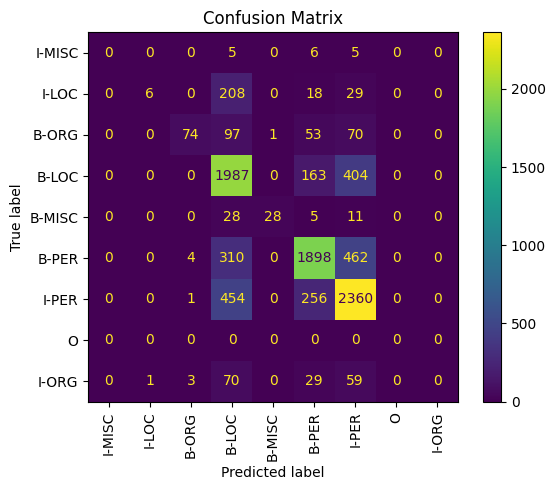

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def generate_confusion_matrix(model, dataloader, label2idx):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for tokens, labels, masks in dataloader:
            preds = model(tokens, mask=masks)
            preds = [p[:sum(m)] for p, m in zip(preds, masks)]  # Remove padding
            labels = [l[:sum(m)] for l, m in zip(labels, masks)]

            all_preds.extend(preds)
            all_labels.extend(labels)

    # Flatten predictions and labels
    flat_preds = np.concatenate(all_preds)
    flat_labels = np.concatenate(all_labels)

    # Generate confusion matrix
    cm = confusion_matrix(flat_labels, flat_preds, labels=list(label2idx.values()))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(label2idx.keys()))
    disp.plot(cmap="viridis", xticks_rotation="vertical")
    plt.title("Confusion Matrix")
    plt.show()

# Call the function with the evaluation DataLoader
generate_confusion_matrix(model, eval_loader, label2idx)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


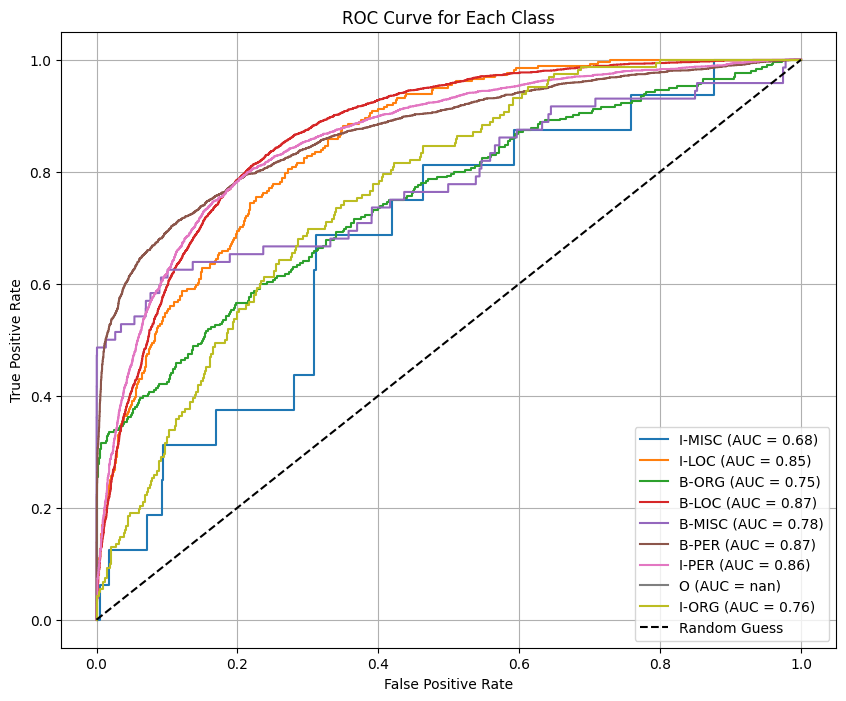

In [38]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def plot_roc_curve(model, dataloader, label2idx):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for tokens, labels, masks in dataloader:
            emissions = model.embedding(tokens)
            lstm_out, _ = model.lstm(emissions)
            logits = model.fc(lstm_out)
            logits = logits.view(-1, logits.shape[-1])  # Flatten for softmax
            labels = labels.view(-1)  # Flatten labels
            mask = masks.view(-1)  # Flatten mask

            # Apply mask to filter out padding
            logits = logits[mask]
            labels = labels[mask]

            all_preds.append(logits.cpu().numpy())
            all_labels.append(labels.cpu().numpy())

    # Concatenate all predictions and labels
    all_preds = np.concatenate(all_preds, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)

    # Binarize the labels for ROC computation
    num_classes = len(label2idx)
    all_labels_bin = label_binarize(all_labels, classes=list(range(num_classes)))

    # Compute ROC curve and AUC for each class
    plt.figure(figsize=(10, 8))
    for i, label in enumerate(label2idx.keys()):
        fpr, tpr, _ = roc_curve(all_labels_bin[:, i], all_preds[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for Each Class")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Call the function with the evaluation DataLoader
plot_roc_curve(model, eval_loader, label2idx)

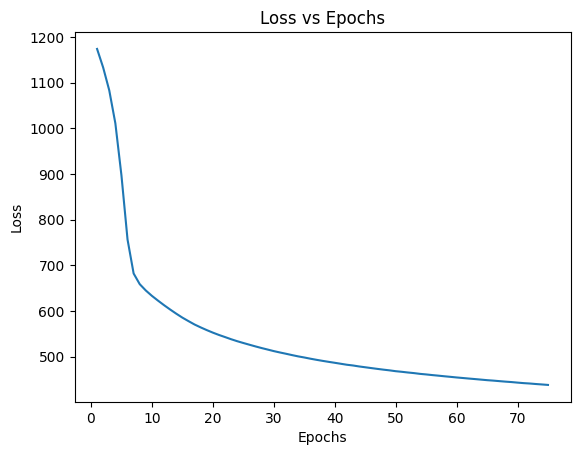

<Figure size 640x480 with 0 Axes>

In [39]:
plt.plot(range(1, EPOCHS+1), logging['Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()
plt.clf()

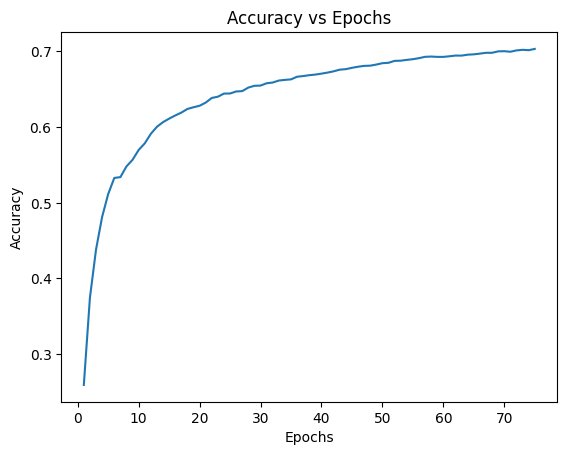

<Figure size 640x480 with 0 Axes>

In [40]:
plt.plot(range(1, EPOCHS+1), logging['Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.show()
plt.clf()

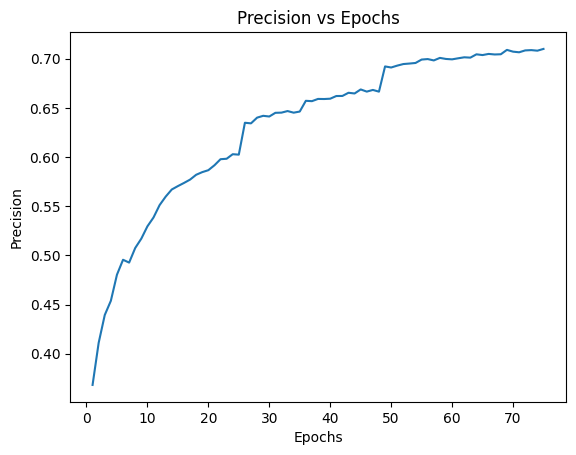

<Figure size 640x480 with 0 Axes>

In [41]:
plt.plot(range(1, EPOCHS+1), logging['Precision'])
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Precision vs Epochs')
plt.show()
plt.clf()

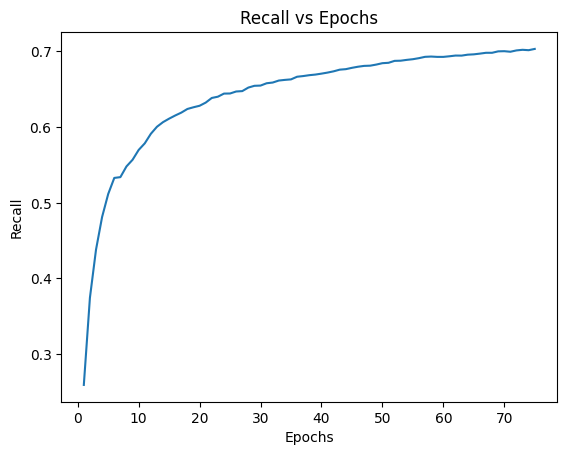

<Figure size 640x480 with 0 Axes>

In [42]:
plt.plot(range(1, EPOCHS+1), logging['Recall'])
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Recall vs Epochs')
plt.show()
plt.clf()

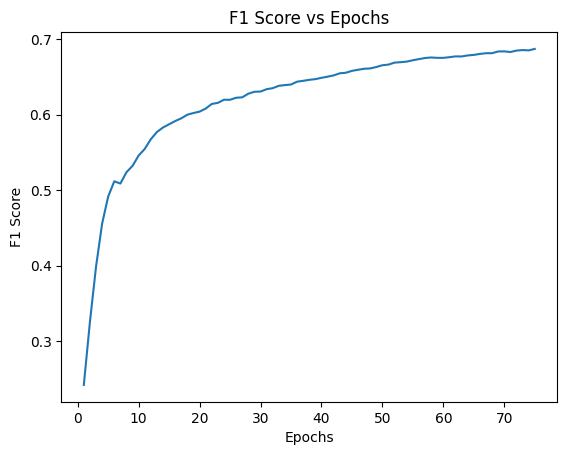

<Figure size 640x480 with 0 Axes>

In [43]:
plt.plot(range(1, EPOCHS+1), logging['F1'])
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Epochs')
plt.show()
plt.clf()

# Pause

In [17]:
# BiLSTM + CRF Model
class BiLSTM_CRF(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_classes):
        super(BiLSTM_CRF, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, num_classes)
        self.crf = CRF(num_classes, batch_first=True)

    def forward(self, x, labels=None, mask=None):
        x = self.embedding(x)
        lstm_out, _ = self.lstm(x)
        emissions = self.fc(lstm_out)

        if labels is not None:
            loss = -self.crf(emissions, labels, mask=mask, reduction="mean")
            return loss
        else:
            return self.crf.decode(emissions, mask=mask)

In [18]:
# Dataset Class
class TokenDataset(Dataset):
    def __init__(self, texts, labels, word2idx, label2idx, max_len=10):
        self.max_len = max_len
        self.word2idx = word2idx
        self.label2idx = label2idx
        self.data, self.labels, self.masks = self.preprocess(texts, labels)

    def preprocess(self, texts, labels):
        tokenized_texts = []
        tokenized_labels = []
        masks = []

        for text, label in zip(texts, labels):
            token_ids = [self.word2idx.get(word, 0) for word in text]
            label_ids = [self.label2idx.get(lbl, 0) for lbl in label]

            # Padding
            pad_length = self.max_len - len(token_ids)
            if pad_length > 0:
                token_ids += [0] * pad_length
                label_ids += [0] * pad_length
                mask = [1] * len(text) + [0] * pad_length
            else:
                token_ids = token_ids[:self.max_len]
                label_ids = label_ids[:self.max_len]
                mask = [1] * self.max_len

            # Ensure first timestep mask is always 1
            if mask[0] == 0:
                mask[0] = 1

            tokenized_texts.append(token_ids)
            tokenized_labels.append(label_ids)
            masks.append(mask)

        return torch.tensor(tokenized_texts, dtype=torch.long), \
               torch.tensor(tokenized_labels, dtype=torch.long), \
               torch.tensor(masks, dtype=torch.bool)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx], self.masks[idx]

In [19]:
# Evaluation Function
def evaluate(model, dataloader):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for tokens, labels, masks in dataloader:
            preds = model(tokens, mask=masks)
            preds = [p[:sum(m)] for p, m in zip(preds, masks)]  # Remove padding
            labels = [l[:sum(m)] for l, m in zip(labels, masks)]

            all_preds.extend(preds)
            all_labels.extend(labels)

    # Convert to numpy for metrics
    flat_preds = np.concatenate(all_preds)
    flat_labels = np.concatenate(all_labels)

    acc = accuracy_score(flat_labels, flat_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(flat_labels, flat_preds, average="weighted", zero_division=0)

    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
    return acc, precision, recall, f1

In [20]:
# train_texts = fiant_token_strings
# train_labels = fiant_token_labels
# Create dataset and dataloader
# train_dataset = TokenDataset(train_texts, train_labels, word2idx, label2idx)
dataset = TokenDataset(fiant_token_strings, fiant_token_labels, word2idx, label2idx)

train_size = int(0.8 * len(dataset))
eval_size = len(dataset) - train_size
train_dataset, test_dataset, eval_dataset = random_split(dataset, [train_size, eval_size])

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
eval_loader = DataLoader(eval_dataset, batch_size=128, shuffle=True)

# Initialize model, optimizer
model = BiLSTM_CRF(VOCAB, 128, 256, NUM_LABELS)
optimizer = optim.Adam(model.parameters(), lr=2e-4)

ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
logging = {'Loss':[], 'Accuracy':[], 'Precision':[], 'Recall':[], 'F1':[]}
# Training Loop
EPOCHS = 75
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for tokens, labels, masks in train_loader:
        optimizer.zero_grad()
        loss = model(tokens, labels, mask=masks)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")
    acc, p, r, f = evaluate(model, eval_loader)
    logging['Loss'].append(total_loss)
    logging['Accuracy'].append(acc)
    logging['Precision'].append(p)
    logging['Recall'].append(r)
    logging['F1'].append(f)

In [ ]:
# Run evaluation
evaluate(model, eval_loader)

# Save model
torch.save(model.state_dict(), "bilstm_crf_model.pth")
print("Model saved successfully!")

In [ ]:
plt.plot(range(1, EPOCHS+1), logging['Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()
plt.clf()

In [ ]:
plt.plot(range(1, EPOCHS+1), logging['Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.show()
plt.clf()

In [ ]:
plt.plot(range(1, EPOCHS+1), logging['Precision'])
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Precision vs Epochs')
plt.show()
plt.clf()

In [ ]:
plt.plot(range(1, EPOCHS+1), logging['Recall'])
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Recall vs Epochs')
plt.show()
plt.clf()

In [ ]:
plt.plot(range(1, EPOCHS+1), logging['F1'])
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Epochs')
plt.show()
plt.clf()